In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend, test_beamline
from phase_space_reconstruction.virtual.scans import run_3d_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.visualization import plot_3d_scan_data
from phase_space_reconstruction.train import train_3d_scan

from bmadx.beam_generator import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

In [2]:
# lattice and data directory
p0c = 43.36e6 # reference momentum in eV/c
lattice = quadlet_tdc_bend(p0c=p0c, dipole_on=False)
data_dir = 'data'

In [3]:
# create gaussian and nongaussian beams using Bmad-X distgen functionality
gaussian_beam = create_beam(
    base_yaml = os.path.join(data_dir,'base.yaml'),
    transforms_yaml = os.path.join(data_dir,'transforms-linear.yaml'), 
    p0c = p0c,
    n_particle = 10_000
    )

nongaussian_beam = create_beam(
    base_yaml = os.path.join(data_dir,'base.yaml'),
    transforms_yaml = os.path.join(data_dir,'transforms-nonlinear.yaml'), 
    p0c = p0c,
    n_particle = 10_000
    )

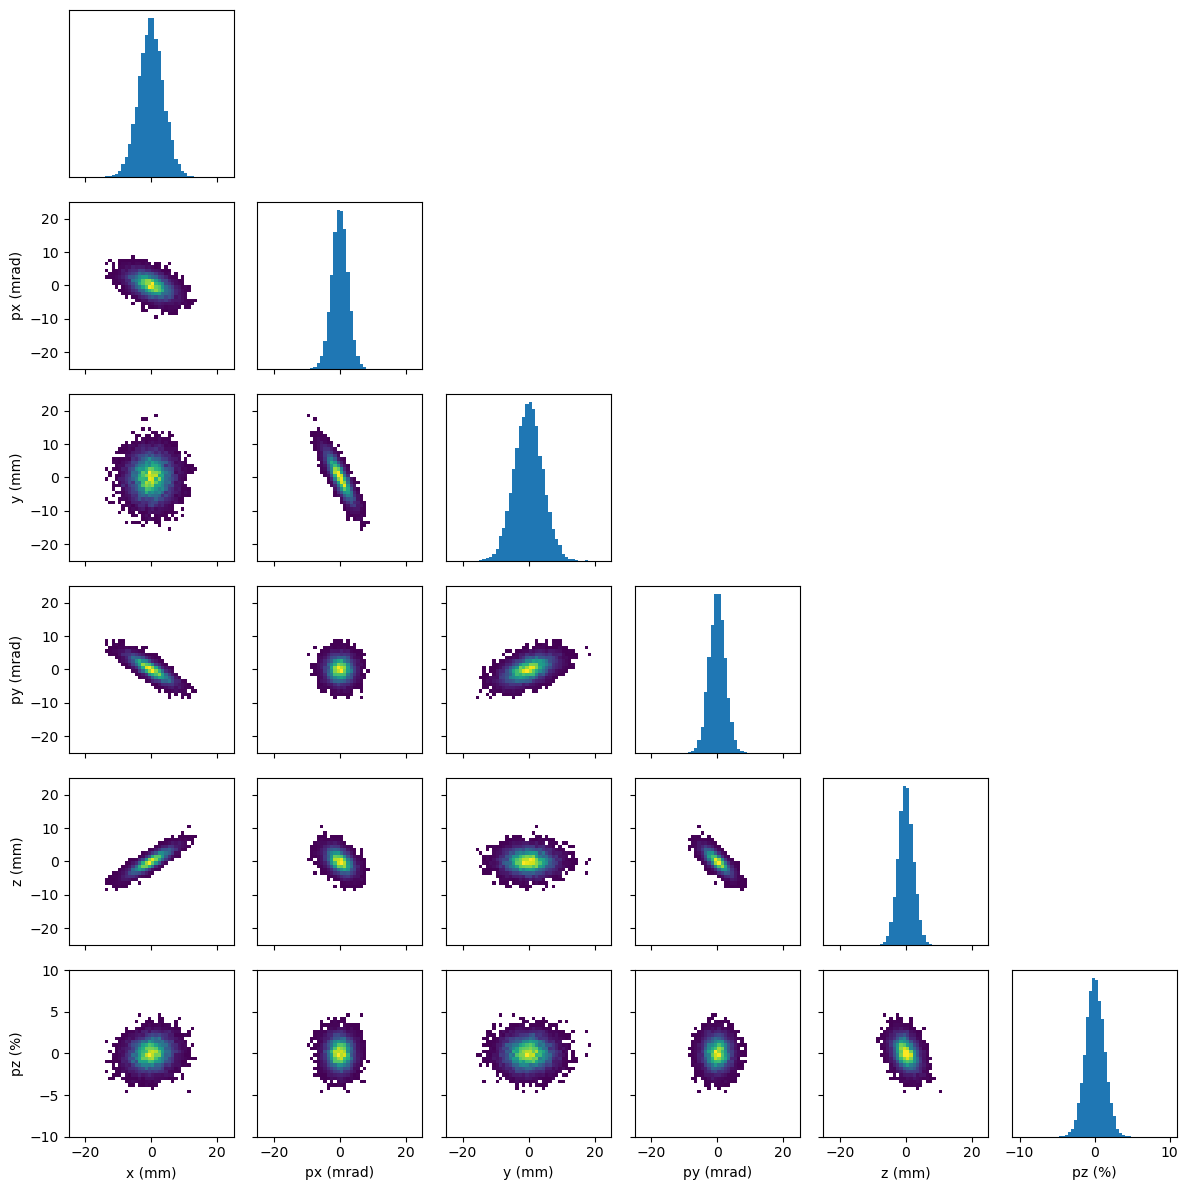

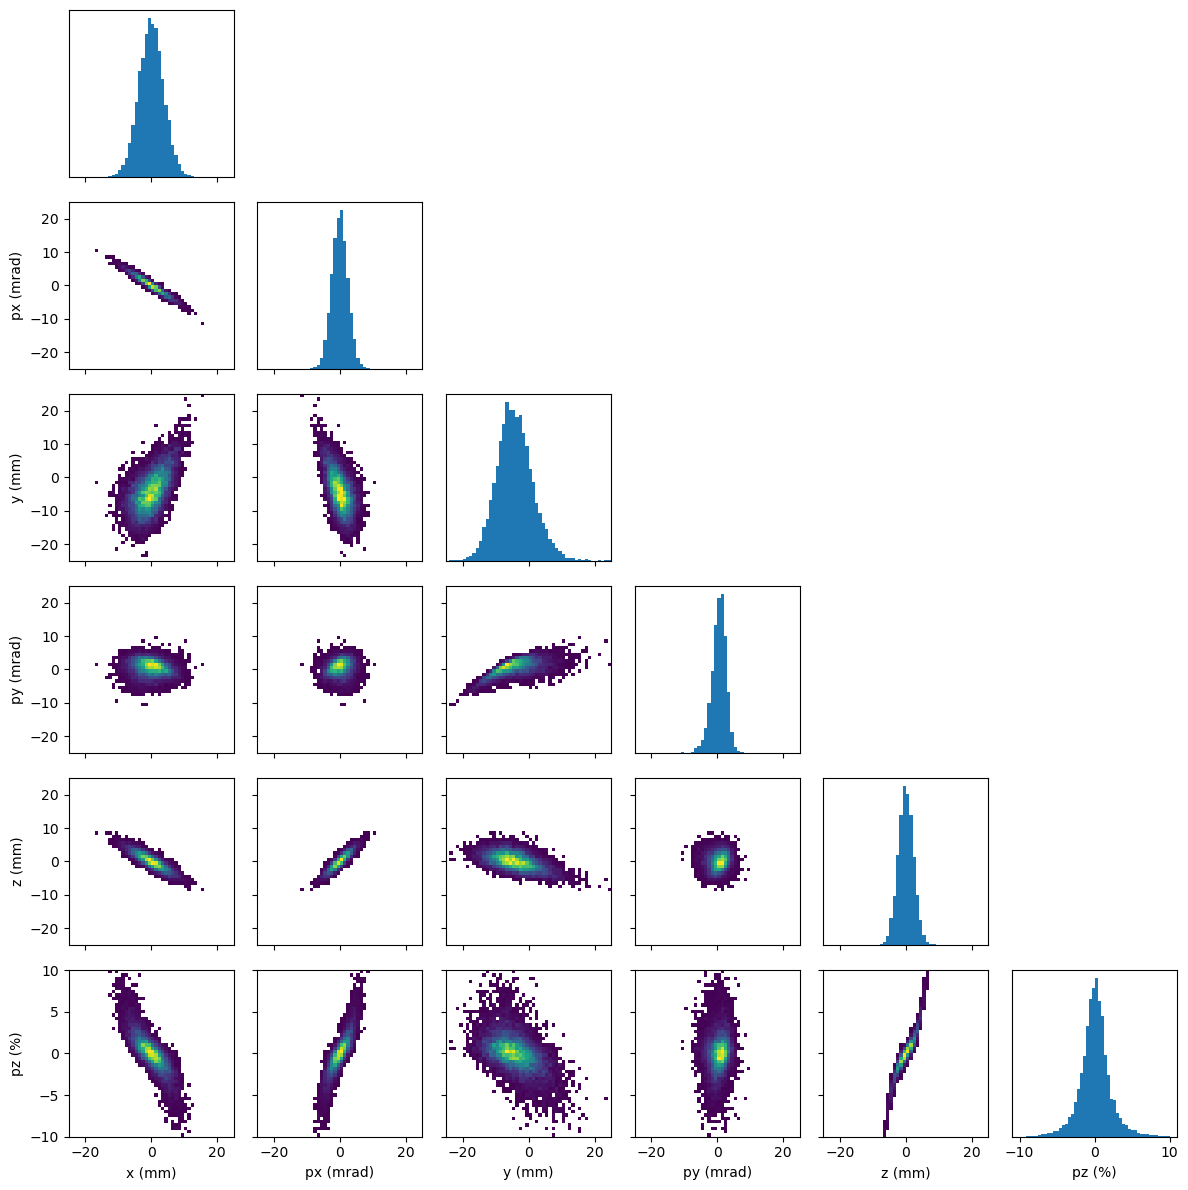

In [4]:
# plot linear and nonlinear beams
lims = np.array(
    [[-25e-3, 25e-3],
     [-25e-3, 25e-3],
     [-25e-3, 25e-3],
     [-25e-3, 25e-3],
     [-25e-3, 25e-3],
     [-10e-2, 10e-2]]
    )
fig, ax = plot_projections(gaussian_beam.numpy_particles(), custom_lims=lims)
plt.show()
fig, ax = plot_projections(nongaussian_beam.numpy_particles(), custom_lims=lims)
plt.show()

In [5]:
# use xopt for optimization
from triplet_opt import optimize_function, output
from xopt import VOCS

opt_vocs = VOCS(
        variables = {"k1":[0,20], "k2":[-20,0], "k3":[1,20]},
        objectives = {"total_size": "MINIMIZE"}
    )

opt_gaussian_beam = optimize_function(
    opt_vocs, output, n_iterations=100, 
    function_kwargs={
        'beam': gaussian_beam,
        'lattice': lattice
    }
)

opt_nongaussian_beam = optimize_function(
    opt_vocs, output, n_iterations=100, 
    function_kwargs={
        'beam': nongaussian_beam,
        'lattice': lattice
    }
)

/Users/jpga/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# optimization results for linear beam
opt_gaussian_beam.data

,k1,k2,k3,std_x,std_y,total_size,xopt_runtime,xopt_error
1,18.636977,-12.653828,9.709838,0.014925,0.028005,0.031734,0.016639,False
2,17.266936,-2.741356,6.888860,0.017822,0.039239,0.043096,0.015968,False
3,11.034828,-11.754101,14.950661,0.011424,0.026680,0.029023,0.015794,False
4,13.606999,-16.933206,15.063014,0.010810,0.021249,0.023841,0.016832,False
5,16.444448,-19.401614,18.564109,0.012811,0.025558,0.028589,0.016874,False
...,...,...,...,...,...,...,...,...
99,7.736553,-10.094500,17.240729,0.011394,0.027506,0.029773,0.016756,False
100,5.651453,-9.730161,15.214853,0.009289,0.022138,0.024008,0.016780,False
101,12.762902,-18.652204,2.895601,0.007774,0.004440,0.008953,0.017863,False
102,15.593526,-2.981386,9.911459,0.017017,0.041850,0.045177,0.016307,False


In [7]:
opt_gaussian_beam.data.iloc[-1][["k1","k2", "k3"]]

k1     2.745518
k2   -19.812225
k3    14.924998
Name: 103, dtype: object

In [8]:
# optimization results for nonlinear beam
opt_nongaussian_beam.data

,k1,k2,k3,std_x,std_y,total_size,xopt_runtime,xopt_error
1,0.959662,-7.293816,5.988017,0.002927,0.009209,0.009663,0.015882,False
2,17.554480,-2.621578,4.056117,0.019905,0.042815,0.047215,0.015462,False
3,15.684482,-13.218772,18.696053,0.016227,0.045900,0.048684,0.016092,False
4,0.000000,-10.510306,2.342967,0.004344,0.005724,0.007186,0.016094,False
5,0.000000,-5.573641,1.000000,0.002001,0.004982,0.005369,0.015834,False
...,...,...,...,...,...,...,...,...
99,8.918136,-0.906411,5.524146,0.013720,0.033620,0.036311,0.016507,False
100,4.063148,-15.419752,17.065840,0.007660,0.014211,0.016144,0.016485,False
101,14.857303,-6.747189,6.986084,0.015946,0.035447,0.038868,0.016532,False
102,16.886362,-4.681334,14.929934,0.019489,0.062733,0.065691,0.016731,False


In [9]:
opt_nongaussian_beam.data.iloc[-1][["k1","k2", "k3"]]

k1     4.909746
k2   -10.878844
k3          1.0
Name: 103, dtype: object